In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [2]:
## Import data

df = pd.read_csv('2016 City Employee Earnings  City of Fort Collins.csv')
df.head()

,Job Title,Department,2016 Earnings
0,CITY MANAGER,CITY MANAGER'S OFFICE,"$264,077.56"
1,CITY ATTORNEY,CITY ATTORNEY'S OFFICE,"$191,141.34"
2,DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE,"$177,600.92"
3,CHIEF OF POLICE,OFFICE OF THE CHIEF,"$173,473.09"
4,ASSISTANT CITY MANAGER,CITY MANAGER'S OFFICE,"$169,134.27"


In [3]:
# Remove currency formatting for manipulation

df['2016 Earnings'] = df['2016 Earnings'].replace('[\$,]', '', regex=True,).astype(float)
df.head()

,Job Title,Department,2016 Earnings
0,CITY MANAGER,CITY MANAGER'S OFFICE,264077.56
1,CITY ATTORNEY,CITY ATTORNEY'S OFFICE,191141.34
2,DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE,177600.92
3,CHIEF OF POLICE,OFFICE OF THE CHIEF,173473.09
4,ASSISTANT CITY MANAGER,CITY MANAGER'S OFFICE,169134.27


In [4]:
# (Just so you know, you can add it back by mapping it)
# tmp is used only for this chunk
#tmp = df.copy()
#tmp['2016 Earnings'] = tmp['2016 Earnings'].apply('${:,.2f}'.format)
#tmp.head()

In [5]:
## Group by

# df.groupby(['column name(s)']).function()

# Finding the sum by Job Title
df.groupby(['Job Title']).sum().head()

,2016 Earnings
Job Title,
ACCOUNTANT II,98749.63
ACCOUNTANT-INACTIVE,6654.40
ACCOUNTING ASSISTANT,45335.08
ACCOUNTING CLERK,5265.00
ACCOUNTING DIR - INACTIVE,7807.69


In [6]:
# Finding the average by Department (demo only, not accurate)
df.groupby(['Department']).mean().head() ## average

,2016 Earnings
Department,
ACCOUNTING AND TREASURY,38073.126000
BUDGET,43421.215000
CITY ATTORNEY'S OFFICE,79955.575500
CITY CLERK'S OFFICE,39278.338182
CITY COUNCIL,9864.000000


In [7]:
# Cleaning up last bit by rounding
df.groupby(['Department']).mean().round(2).head()

,2016 Earnings
Department,
ACCOUNTING AND TREASURY,38073.13
BUDGET,43421.22
CITY ATTORNEY'S OFFICE,79955.58
CITY CLERK'S OFFICE,39278.34
CITY COUNCIL,9864.00


In [8]:
# Departments grouped by earnings, sorted ascending (default)
df.groupby(['Department']).sum().sort_values(by='2016 Earnings').head()

,2016 Earnings
Department,
UTILITY TECH. & CUST. SERVICE,21329.58
UTILITIES STRATEGIC PLANNING,57044.91
CITY COUNCIL,69048.00
COMMUNITY SERVICES ADMIN,80438.93
SAFETY AND SECURITY,96434.25


In [9]:
# Top earning departments sorted descending (properly)
df.groupby(['Department']).sum().sort_values(by='2016 Earnings', ascending=False).head()

,2016 Earnings
Department,
POUDRE FIRE AUTHORITY,18979511.74
PATROL,14470421.93
RIDE,6258753.80
ELECTRIC FIELD SERVICES,5827205.84
PARKS,5608627.47


In [10]:
# Only select Job Title and Department columns
df[['Job Title','Department']].head()

,Job Title,Department
0,CITY MANAGER,CITY MANAGER'S OFFICE
1,CITY ATTORNEY,CITY ATTORNEY'S OFFICE
2,DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE
3,CHIEF OF POLICE,OFFICE OF THE CHIEF
4,ASSISTANT CITY MANAGER,CITY MANAGER'S OFFICE


In [11]:
# Remove single column (axis defaults to 0, which is the index. the other option is 1, which is columns)
df.drop(['2016 Earnings'],axis=1).head()

,Job Title,Department
0,CITY MANAGER,CITY MANAGER'S OFFICE
1,CITY ATTORNEY,CITY ATTORNEY'S OFFICE
2,DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE
3,CHIEF OF POLICE,OFFICE OF THE CHIEF
4,ASSISTANT CITY MANAGER,CITY MANAGER'S OFFICE


In [12]:
# Filter by department PARKS

df[df['Department'] == 'PARKS'].head()

,Job Title,Department,2016 Earnings
174,DIRECTOR OF PARKS,PARKS,100976.40
369,MGR OF FORESTRY/ CITY FORESTER,PARKS,89111.66
563,PARKS SUPERVISOR,PARKS,81152.17
590,PARKS SUPERVISOR,PARKS,79652.17
594,PARKS PROJECT MANAGER,PARKS,79233.81


In [13]:
# Can filter with lambda function... let's say Job Title has to end with MANAGER
# (you can map or apply any function really...)
criterion = df['Job Title'].map(lambda x: x.endswith('MANAGER'))
df[criterion].head()

,Job Title,Department,2016 Earnings
0,CITY MANAGER,CITY MANAGER'S OFFICE,264077.56
2,DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE,177600.92
4,ASSISTANT CITY MANAGER,CITY MANAGER'S OFFICE,169134.27
8,ASSISTANT CITY MANAGER,CITY MANAGER'S OFFICE,162739.03
96,WATER PRODUCTION MANAGER,UT WATER PRODUCTION DIV,111640.08


In [14]:
# You can drop duplicates based off of rows
# We'll take the same criteria as above, and drop anything department that is the same (only keeps first, 
# you can specify changes to that if necessary or just change sorting/indexing order)
tmp = df.copy()
tmp = tmp[criterion]
tmp.drop_duplicates('Department').head()


,Job Title,Department,2016 Earnings
0,CITY MANAGER,CITY MANAGER'S OFFICE,264077.56
96,WATER PRODUCTION MANAGER,UT WATER PRODUCTION DIV,111640.08
98,TRANSFORT/DAR GENERAL MANAGER,RIDE,111569.77
135,ELECTRIC FIELD SERVICE MANAGER,ELECTRIC FIELD SERVICES,106046.92
141,WATER RESOURCES MANAGER,UT WATER RESOURCES DIV,104524.99


In [15]:
#import stock data, get closing prices and return as dataframe (just acquisition, no wrangling yet)
tickers = ['AAPL','AMZN','MSFT']
data_source = 'yahoo'
start_date = '2012-01-01'
end_date = '2017-12-31'
panel_data = pdr.DataReader(tickers, data_source, start_date, end_date)

In [16]:
data = panel_data.loc['Adj Close']
data.head()

,AAPL,AMZN,MSFT
Date,,,
2017-12-29,169.229996,1169.469971,85.540001
2017-12-28,171.080002,1186.099976,85.720001
2017-12-27,170.600006,1182.260010,85.709999
2017-12-26,170.570007,1176.760010,85.400002
2017-12-22,175.009995,1168.359985,85.510002


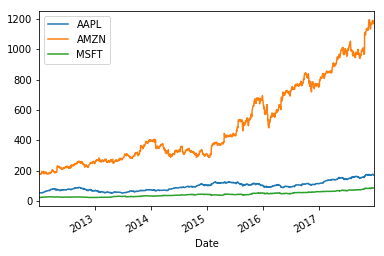

In [17]:
%matplotlib inline
data.plot()

In [18]:
# Dates will be "off" when comparing due to weekdays not aligning for comparison purposes
# freq='B' grabs weekdays
all_weekdays = pd.date_range(start=start_date,end=end_date, freq='B')
all_weekdays

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21',
               '2017-12-22', '2017-12-25', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', length=1565, freq='B')

In [19]:
data = data.reindex(all_weekdays)
data.head()

,AAPL,AMZN,MSFT
2012-01-02,NaN,NaN,NaN
2012-01-03,52.662899,179.029999,22.795326
2012-01-04,52.945919,177.509995,23.331791
2012-01-05,53.533730,177.610001,23.570217
2012-01-06,54.093361,182.610001,23.936375


In [20]:
# NaN were introduced (there are holidays and such that don't line up either)
# Fill it in with most recent price... probably okay to use for analysis
data = data.fillna(method='ffill')
data = panel_data.loc['Adj Close']
data.sort_index().head()

,AAPL,AMZN,MSFT
Date,,,
2012-01-03,52.662899,179.029999,22.795326
2012-01-04,52.945919,177.509995,23.331791
2012-01-05,53.533730,177.610001,23.570217
2012-01-06,54.093361,182.610001,23.936375
2012-01-09,54.007557,178.559998,23.621305


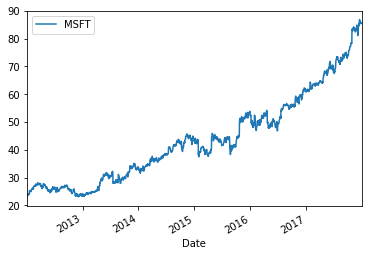

In [21]:
# What if we only care about MSFT by date?
msft = data[['MSFT']]
msft.plot()

/Users/stoltzmanconsulting/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


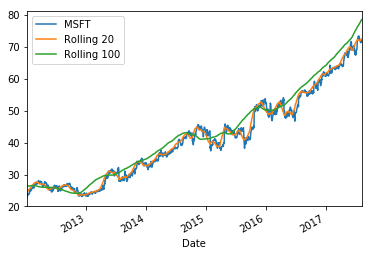

In [22]:
# How can we do calculations within the dataframe?
# Window functions...
msft['Rolling 20'] = msft['MSFT'].rolling(window=20).mean()
msft['Rolling 100'] = msft['MSFT'].rolling(window=100).mean()
msft = msft.dropna() # moving average not applicable for future
msft.plot()

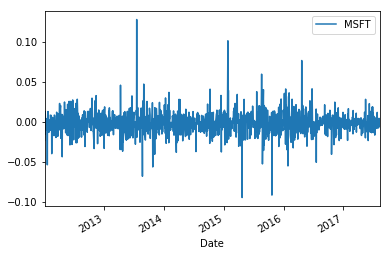

In [23]:
# percent change is super easy... (just choose how far apart to diff)
# for example, daily change percentage....
msft = msft[['MSFT']]
msft_ = msft.pct_change(1)
msft_.plot()

In [24]:
# Time series manipulation is easy
# Let's say you wanted to pivot to see months and years on each axis
msft = data[['MSFT']]
msft = msft.reset_index() # just renames index to 0:max rows... (probably more efficient way to do this out there)
msft['Year'] = msft['Date'].dt.year
msft['Month'] = msft['Date'].dt.month
pd.pivot_table(msft, index='Month', columns = 'Year', values = 'MSFT', aggfunc = np.sum)

Year,2012,2013,2014,2015,2016,2017
Month,,,,,,
1,485.650333,500.820981,688.628664,843.651083,947.912701,1236.236454
2,526.890069,462.507970,640.615198,761.182530,981.854575,1195.376343
3,607.097296,496.889330,744.080029,865.168159,1126.145486,1467.621305
4,540.086804,580.178021,766.010967,852.007218,1088.452277,1237.255861
5,571.965593,662.203644,765.265251,889.582643,1029.778597,1496.332001
6,537.746697,615.798640,795.010821,949.997184,1081.678223,1535.466859
7,539.135738,658.170672,870.173484,942.716303,1044.793180,1425.418820
8,604.839275,638.240374,853.035698,900.509643,1285.976596,1662.598938
9,507.933762,582.373645,897.657054,865.081140,1168.906892,1479.460012


In [25]:
### We can look at pulling from a database
import sqlite3
conn = sqlite3.connect('example.db')

In [27]:
# Use pandas to query database
df.to_sql('foco_earnings_2016', con = conn, if_exists='replace')

/Users/stoltzmanconsulting/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:1362: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [28]:
df_db = pd.read_sql('SELECT * FROM foco_earnings_2016', con = conn)
df_db.head()

,index,Job Title,Department,2016 Earnings
0,0,CITY MANAGER,CITY MANAGER'S OFFICE,264077.56
1,1,CITY ATTORNEY,CITY ATTORNEY'S OFFICE,191141.34
2,2,DEPUTY CITY MANAGER,CITY MANAGER'S OFFICE,177600.92
3,3,CHIEF OF POLICE,OFFICE OF THE CHIEF,173473.09
4,4,ASSISTANT CITY MANAGER,CITY MANAGER'S OFFICE,169134.27


In [30]:
# Cursor is how you can run commands in the database as well
c = conn.cursor()
sql_data = []
for row in c.execute("SELECT * FROM foco_earnings_2016"):
    sql_data.append(row)
sql_data

[(0, 'CITY MANAGER', "CITY MANAGER'S OFFICE", 264077.56),
 (1, 'CITY ATTORNEY', "CITY ATTORNEY'S OFFICE", 191141.34),
 (2, 'DEPUTY CITY MANAGER', "CITY MANAGER'S OFFICE", 177600.92),
 (3, 'CHIEF OF POLICE', 'OFFICE OF THE CHIEF', 173473.09),
 (4, 'ASSISTANT CITY MANAGER', "CITY MANAGER'S OFFICE", 169134.27),
 (5, 'CHIEF FINANCIAL OFFICER', 'FINANCE ADMINISTRATION', 166563.61),
 (6, 'ADMINISTRATIVE FIRE CHIEF', 'POUDRE FIRE AUTHORITY', 165041.42),
 (7, 'UTILITIES EXECUTIVE DIRECTOR', 'UTILITIES MANAGEMENT', 163905.09),
 (8, 'ASSISTANT CITY MANAGER', "CITY MANAGER'S OFFICE", 162739.03),
 (9, 'POLICE ASSISTANT CHIEF', 'OFFICE OF THE CHIEF', 144158.95),
 (10, 'SPECIAL SERVICES SUPERVISOR', 'ELECTRIC FIELD SERVICES', 142339.72),
 (11, 'DIRECTOR OF PDT', 'PDT ADMINISTRATION', 140668.69),
 (12, 'POLICE DEPUTY CHIEF', 'PATROL', 139974.75),
 (13, 'POLICE DEPUTY CHIEF', 'POLICE INFORMATION SERVICES', 139974.75),
 (14, 'DEPUTY CITY ATTORNEY', "CITY ATTORNEY'S OFFICE", 137403.45),
 (15, 'POLICE DE

In [32]:
# To close a connection...
conn.close()